# Proyecto análisis de conversación de mensajería

In [ ]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [112]:
from datetime import *

def extract_time(date):
    return datetime.strptime(date, "%Y-%m-%dT%H:%M:%S")

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [113]:
import pandas as pd

df = pd.read_json("../data/result.json")

df = pd.DataFrame([msg for msg in df["messages"] if msg["type"] == "message"])

df = df.filter(items = ['id','type', 'date', 'from', 'from_id', 'text'])

df

,id,type,date,from,from_id,text
0,2,message,2016-08-18T12:32:42,Diego Córdoba (at @juncotic),user8853399,"[Si quieren invitar al resto pasen este link, ..."
1,3,message,2016-08-18T12:46:21,None,user236615816,Okaa
2,8,message,2016-08-18T13:33:46,None,user235637933,👍
3,10,message,2016-08-18T18:49:13,Diego Córdoba (at @juncotic),user8853399,"Gente, a los que me pasaron su mail les di el ..."
4,11,message,2016-08-18T18:49:59,Diego Córdoba (at @juncotic),user8853399,si alguien mas quiere me pasa el mail y los vo...
...,...,...,...,...,...,...
3371,3464,message,2021-09-08T17:05:26,Diego Córdoba (at @juncotic),user8853399,Estimados! Acabo de publicar los videos de la ...
3372,3465,message,2021-09-08T17:06:03,Julián,user784162152,Joya profe!
3373,3466,message,2021-09-08T17:06:30,Diego Córdoba (at @juncotic),user8853399,"[Además, hoy durante la clase definimos la fec..."
3374,3468,message,2021-09-08T17:28:53,Tato Beato,user1077377295,👌👌👌


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [114]:
df.dtypes

id          int64
type       object
date       object
from       object
from_id    object
text       object
dtype: object

# Campos del DataFrame
- id: Identificador del mensaje.
- type: Tipo de mensaje. Puede ser, mensaje, aviso, anuncio, etc. Hemos filtrado solo aquellos que tienen como tipo 'mensaje'.
- date: Fecha del mensaje.
- from: Usuario que envio el mensaje.
- from_id: Identificador del usuario que envio el mensaje.
- text: Contenido del mensaje. Si tiene link, es un listado que contiene el contenido del mensaje y al link que redirije.

## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [115]:
import numpy as np

missing = []
for column in df.columns:
    data = {}
    data['column'] = column
    data['type'] = df[column].dtypes
    data['percentage'] = np.mean(df[column].isnull())*100
    data['quantity'] = np.sum(df[column].isnull())
    missing.append(data)

missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,id,int64,0.000000,0
1,type,object,0.000000,0
2,date,object,0.000000,0
3,from,object,5.657583,191
4,from_id,object,0.000000,0
5,text,object,0.000000,0


<AxesSubplot:>

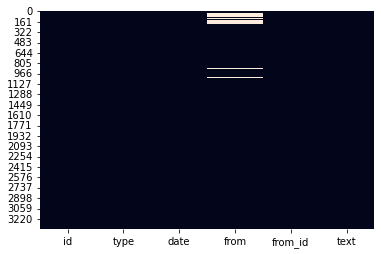

In [116]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué

In [117]:
df_clear = df[~df['from'].isnull()]

df_clear

,id,type,date,from,from_id,text
0,2,message,2016-08-18T12:32:42,Diego Córdoba (at @juncotic),user8853399,"[Si quieren invitar al resto pasen este link, ..."
3,10,message,2016-08-18T18:49:13,Diego Córdoba (at @juncotic),user8853399,"Gente, a los que me pasaron su mail les di el ..."
4,11,message,2016-08-18T18:49:59,Diego Córdoba (at @juncotic),user8853399,si alguien mas quiere me pasa el mail y los vo...
6,13,message,2016-08-18T18:50:10,Diego Córdoba (at @juncotic),user8853399,👍🏼
7,14,message,2016-08-18T18:50:36,Diego Córdoba (at @juncotic),user8853399,"es un curso introductorio, no es la gran cosa,..."
...,...,...,...,...,...,...
3371,3464,message,2021-09-08T17:05:26,Diego Córdoba (at @juncotic),user8853399,Estimados! Acabo de publicar los videos de la ...
3372,3465,message,2021-09-08T17:06:03,Julián,user784162152,Joya profe!
3373,3466,message,2021-09-08T17:06:30,Diego Córdoba (at @juncotic),user8853399,"[Además, hoy durante la clase definimos la fec..."
3374,3468,message,2021-09-08T17:28:53,Tato Beato,user1077377295,👌👌👌


Borramos las lineas vacias ya que son mensajes de personas que han salido o han sido expulsados del grupo y no nos interesa ya que son mensajes enviados por alguien inexistente, por lo tanto, son irrelevantes.

In [118]:
missing = []
for column in df_clear.columns:
    data = {}
    data['column'] = column
    data['type'] = df[column].dtypes
    data['percentage'] = np.mean(df_clear[column].isnull())*100
    data['quantity'] = np.sum(df_clear[column].isnull())
    missing.append(data)

missing_df = pd.DataFrame(missing)
missing_df

,column,type,percentage,quantity
0,id,int64,0.0,0
1,type,object,0.0,0
2,date,object,0.0,0
3,from,object,0.0,0
4,from_id,object,0.0,0
5,text,object,0.0,0


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [119]:
df_clear[['type', 'from']].describe()

,type,from
count,3185,3185
unique,1,37
top,message,Diego Córdoba (at @juncotic)
freq,3185,1593


Se tiene en cuenta que hay 3185 mensajes, de los cuales, el usuario que escribrio con mas frecuencia es Diego Córdoba entre otros 37 usuarios.

In [120]:
Q1 = df_clear.quantile(0.25)
Q3 = df_clear.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id    1646.0
dtype: float64


Con el IQR podemos observar la tendencia central de los datos

In [121]:
# Rangos normales de datos
lower_rank = Q1 - 1.5 * IQR
higher_rank = Q3 + 1.5 * IQR

print(f"""
Rango Inferior:
{lower_rank}

Rango Superior:
{higher_rank}
""")


Rango Inferior:
id   -1480.0
dtype: float64

Rango Superior:
id    5104.0
dtype: float64



In [122]:
# Mostrar si un valor es atipico o no
df_outliers = (df_clear < lower_rank) | (df_clear > higher_rank)
df_outliers

C:\Users\Juan Pablo\AppData\Local\Temp/ipykernel_820/3629132285.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = (df_clear < lower_rank) | (df_clear > higher_rank)


,date,from,from_id,id,text,type
0,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
...,...,...,...,...,...,...
3371,False,False,False,False,False,False
3372,False,False,False,False,False,False
3373,False,False,False,False,False,False
3374,False,False,False,False,False,False


<AxesSubplot:>

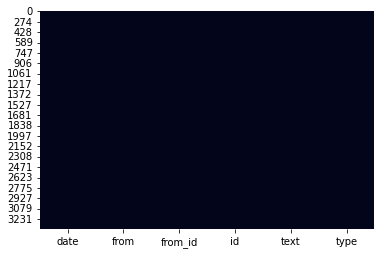

In [123]:
sns.heatmap(df_outliers, cbar=False)

<AxesSubplot:>

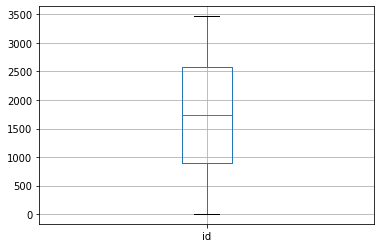

In [125]:
df.boxplot()

- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón

No hay valores atípicos en la muestra recolectada.